In [524]:
import tweepy
import pandas as pd
import json
import re
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
from gensim import corpora
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
import nltk
import string
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import sent_tokenize, word_tokenize, pos_tag
from PIL import Image
import gensim
from gensim import corpora
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [65]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [21]:
%run ./key.ipynb
auth = tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

In [25]:
output_file = 'tweeter.csv'
tweets_to_capture = 20000

In [26]:
tweet_list=[]
class MyStreamListener(tweepy.StreamListener):
    def __init__(self,api=None):
        super(MyStreamListener,self).__init__()
        self.num_tweets=0
        self.file=open(output_file,"w")
    def on_status(self,status):
        tweet=status._json
        self.file.write(json.dumps(tweet)+ '\n')
        tweet_list.append(status)
        self.num_tweets+=1
        if self.num_tweets<= tweets_to_capture:
            return True
        else:
            return False
        self.file.close()

In [27]:
%%time
l = MyStreamListener()
stream =tweepy.Stream(auth,l)
#this line filters twiiter streams to capture data by keywords
stream.filter(track=['Bangladesh'])

Wall time: 2h 36min 15s


In [543]:
df=pd.read_csv('C:\\Users\\MESSI\\Documents\\tweeter.csv',encoding='latin1',error_bad_lines=False,quotechar='"')

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     20000 non-null  int64  
 1   text           20000 non-null  object 
 2   favorited      20000 non-null  bool   
 3   favoriteCount  20000 non-null  int64  
 4   replyToSN      1225 non-null   object 
 5   created        20000 non-null  object 
 6   truncated      20000 non-null  bool   
 7   replyToSID     1171 non-null   float64
 8   id             20000 non-null  int64  
 9   replyToUID     1225 non-null   float64
 10  statusSource   20000 non-null  object 
 11  screenName     20000 non-null  object 
 12  retweetCount   20000 non-null  int64  
 13  isRetweet      20000 non-null  bool   
 14  retweeted      20000 non-null  bool   
 15  longitude      1 non-null      float64
 16  latitude       1 non-null      float64
dtypes: bool(4), float64(4), int64(4), object(5)
memory

In [548]:
df.describe()

Unnamed: 0  favoriteCount    replyToSID            id    replyToUID  \
count  20000.000000   20000.000000  1.171000e+03  2.000000e+04  1.225000e+03   
mean   10000.500000       0.582100  1.440683e+18  1.450593e+18  5.024448e+17   
std     5773.647028      23.777835  8.254990e+16  3.279439e+13  5.857636e+17   
min        1.000000       0.000000  7.193971e+09  1.450543e+18  1.200000e+01   
25%     5000.750000       0.000000  1.450359e+18  1.450561e+18  1.407433e+08   
50%    10000.500000       0.000000  1.450518e+18  1.450591e+18  2.876471e+09   
75%    15000.250000       0.000000  1.450565e+18  1.450625e+18  1.084767e+18   
max    20000.000000    2243.000000  1.450641e+18  1.450641e+18  1.450618e+18   

       retweetCount  longitude  latitude  
count  20000.000000     1.0000    1.0000  
mean    1088.191600    90.4152   23.7302  
std     1400.126043        NaN       NaN  
min        0.000000    90.4152   23.7302  
25%       47.000000    90.4152   23.7302  
50%      383.000000    90.4152   23.7302  
75%     2016.000000    90.4152   23.7302  
max     9177.000000    90.4152   23.7302

In [549]:
len(df)

20000

In [550]:
df.tail(4)

Unnamed: 0  \
19996       19997   
19997       19998   
19998       19999   
19999       20000   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             text  \
19996  RT @upadhyayabhii: Big--<U+092C><U+0921><U+093C><U+093E> <U+0938><U+091A> <U+0906><U+092F><U+093E> <U+0938><U+093E><U+092E><U+0928><U+0947><U+0964> <U+092C><U+093E><U+0902><U+0917><U+094D><U+0932><U+093E><U+0926><U+0947><U+0936> <U+0915><U+0947> <U+0917><U+0943><U+0939> <U+092E><U+0902><U+0924><U+094D><U+0930><U+0940> <U+0915><U+093E> <U+092C><U+0921><U+093C><U+093E> <U+092C><U+092F><U+093E><U+0928>- <U+0926><U+0941><U+0930><U+094D><U+0917><U+093E> <U+092A><U+0942><U+091C><U+093E> <U+092A><U+0902><U+0921><U+093E><U+0932><U+094B><U+0902> <U+092A><U+0930> <U+0939><U+092E><U+0932><U+0947> <U+0915><U+0947> <U+0932><U+093F><U+090F> <U+092A><U+0939><U+0932><U+0947> <U+0938><U+0947> <U+0930><U+091A><U+0940> <U+0917><U+0908> <U+0925><U+0940> <U+0938><U+093E>
   
19997                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Breaking news. @SuPriyoBabul is planning to go to Bangladesh, he may have a better opportunity for a cabinate minis
 https://t.co/1XFmYjnKqd   
19998                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                RT @ManMundra: It has gone beyond a point of no return. You cant stop it. It has happened in Afganistan, happening in Pakistan and will ha
   
19999                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 RT @AskAnshul: After 'Rohingya football club', here is 'Bangladesh Youth'. And, later they changed it to 'Miya Bhai Youth' due to outrage.
   

       favorited  favoriteCount    

## Cleaning 

In [551]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    #tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = re.sub(r'[RT:]+','',tweet)#replace RT-tags
    tweet = re.sub('<[^>]+>', '', tweet)
    
    return tweet
df['text'] = df['text'].map(lambda x: cleaner(x))

In [552]:
df.head(6)

Unnamed: 0  \
0           1   
1           2   
2           3   
3           4   
4           5   
5           6   

                                                                                                                              text  \
0                            BIG At the request of the Bangladesh Govt. witter deletes Bangladesh Hindu Unity Council's twitter ha   
1                                                                           Hundreds protest in Bangladesh over religious violence   
2    We are appalled by recent reports of deadly attacks on the Hindu community in Bangladesh. All, including members of religious   
3                                                  Now, protests in USA against the violence on emples &amp; Hindus in Bangladesh.   
4                                                                                                      in                        
5                                                                         Bangladesh            27      20WorldCup2021 Mahmudullah   

   favorited  favoriteCount replyToSN              created  truncated  \
0      False              0       NaN  2021-10-20 01:52:15      False   
1      False              0       NaN  2021-10-20 01:52:14      False   
2      False              0       NaN  2021-10-20 01:52:13      False   
3      False              0       NaN  2021-10-20 01:52:12      False   
4      False              0       NaN  2021-10-20 01:52:11      False   
5      False              0       NaN  2021-10-20 01:52:11       True   

   replyToSID                   id  replyToUID  \
0         NaN  1450640978625236992         NaN   
1         NaN  1450640973856317445         NaN   
2         NaN  1450640971083907073         NaN   
3         NaN  1450640963878096901         NaN   
4         NaN  1450640962468737024         NaN   
5         NaN  1450640961747361794         NaN   

                                                                           statusSource  \
0    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1               <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>   
2  <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>   
3  <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>   
4  <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>   
5               <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>   

      screenName  retweetCount  isRetweet  retweeted  longitude  latitude  
0      arvind291           292       True      False        NaN       NaN  
1       gojharan           280       True      False        NaN       NaN  
2   amodbhardwaj           898       True      False        NaN       NaN  
3  VamsiKandula2          4260       True      False        NaN       NaN  
4   Karan_Hu_Mei          2012       True      False        NaN       NaN  
5    TNNavbharat             0      False      False        NaN       NaN

In [553]:
df = df.drop(['replyToSN','longitude','latitude','replyToSID','replyToUID','Unnamed: 0','favorited','favoriteCount','truncated','retweeted'],axis = 1)

In [554]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          20000 non-null  object
 1   created       20000 non-null  object
 2   id            20000 non-null  int64 
 3   statusSource  20000 non-null  object
 4   screenName    20000 non-null  object
 5   retweetCount  20000 non-null  int64 
 6   isRetweet     20000 non-null  bool  
dtypes: bool(1), int64(2), object(4)
memory usage: 957.2+ KB


In [555]:
def clear(tweet):
    tweet = re.sub('<[^>]+>', '', tweet)
    return tweet
df['statusSource'] = df['statusSource'].map(lambda x: clear(x))

In [556]:
df.head(4)

text  \
0                            BIG At the request of the Bangladesh Govt. witter deletes Bangladesh Hindu Unity Council's twitter ha   
1                                                                           Hundreds protest in Bangladesh over religious violence   
2    We are appalled by recent reports of deadly attacks on the Hindu community in Bangladesh. All, including members of religious   
3                                                  Now, protests in USA against the violence on emples &amp; Hindus in Bangladesh.   

               created                   id         statusSource  \
0  2021-10-20 01:52:15  1450640978625236992   Twitter for iPhone   
1  2021-10-20 01:52:14  1450640973856317445      Twitter Web App   
2  2021-10-20 01:52:13  1450640971083907073  Twitter for Android   
3  2021-10-20 01:52:12  1450640963878096901  Twitter for Android   

      screenName  retweetCount  isRetweet  
0      arvind291           292       True  
1       gojharan           280       True  
2   amodbhardwaj           898       True  
3  VamsiKandula2          4260       True

In [557]:
df['text'] = df['text'].str.encode('ascii', 'ignore').str.decode('ascii')

In [558]:
df.text

0                                              BIG At the request of the Bangladesh Govt. witter deletes Bangladesh Hindu Unity Council's twitter ha
1                                                                                             Hundreds protest in Bangladesh over religious violence
2                      We are appalled by recent reports of deadly attacks on the Hindu community in Bangladesh. All, including members of religious
3                                                                    Now, protests in USA against the violence on emples &amp; Hindus in Bangladesh.
4                                                                                                                            in                     
5                                                                                           Bangladesh            27      20WorldCup2021 Mahmudullah
6                      We are appalled by recent reports of deadly attacks on the Hindu community in Bangl

In [559]:
df["statusSource_count"] = 1
df_statusSource = df.groupby(['statusSource'], as_index=False, sort=False)[["statusSource_count"]].sum()
df_statusSource = df_statusSource.sort_values("statusSource_count", axis = 0, ascending = False).head(3)
df_statusSource

statusSource  statusSource_count
2  Twitter for Android               12617
1      Twitter Web App                3661
0   Twitter for iPhone                3288

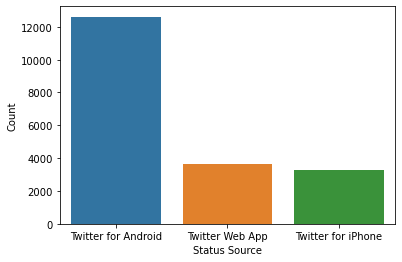

In [560]:

sns.barplot(df_statusSource.statusSource,df_statusSource.statusSource_count)
plt.xlabel("Status Source")
plt.ylabel("Count")
plt.show()

### Clustering

In [561]:
def subjectivity_check(tweet):
    return TextBlob(tweet).sentiment.subjectivity
def polarity_check(tweet):
    return TextBlob(tweet).sentiment.polarity

#Applying the values of subjectivity_check and polarity_check to our newly added 'subjectivity' and 'polarity' columns.
df['subjectivity']=df['text'].apply(subjectivity_check)
df['polarity']=df['text'].apply(polarity_check)

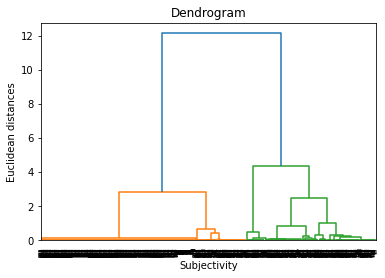

In [562]:
data=df.iloc[0:1000, [7,8]].values
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Subjectivity')
plt.ylabel('Euclidean distances')
plt.show()

In [563]:
from sklearn.cluster import AgglomerativeClustering
clusters = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
p_clusters=clusters.fit_predict(data)

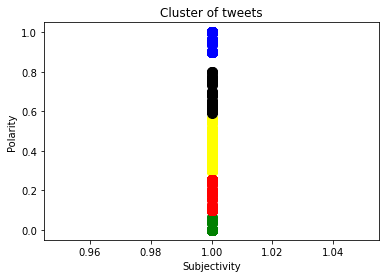

In [564]:
plt.scatter(data[p_clusters == 0,0], data[p_clusters == 0,1], s=100, c='yellow', label='cluster 1')
plt.scatter(data[p_clusters == 1,0], data[p_clusters == 1,1], s=100, c='black', label='cluster 2')
plt.scatter(data[p_clusters == 2,0], data[p_clusters == 2,1], s=100, c='blue', label='cluster 3')
plt.scatter(data[p_clusters == 3,0], data[p_clusters == 3,1], s=100, c='green', label='cluster 4')
plt.scatter(data[p_clusters == 4,0], data[p_clusters == 4,1], s=100, c='red', label='cluster 5')
plt.title("Cluster of tweets")
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
plt.show()

## K Means Clustering

In [565]:
data = df['text']
data.head()

0                              BIG At the request of the Bangladesh Govt. witter deletes Bangladesh Hindu Unity Council's twitter ha
1                                                                             Hundreds protest in Bangladesh over religious violence
2      We are appalled by recent reports of deadly attacks on the Hindu community in Bangladesh. All, including members of religious
3                                                    Now, protests in USA against the violence on emples &amp; Hindus in Bangladesh.
4                                                                                                            in                     
Name: text, dtype: object

## Converting text to TF-IDF

In [566]:
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',
                             max_features = 5000)
%time tf_idf = tf_idf_vectorizor.fit_transform(data.values.astype('U')) #astype('U') to convert object to unicode
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

Wall time: 385 ms


In [567]:
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

000  007   01  034   04   07  070  0774   08  0mar   10  100  1000  1000s  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0    0.0   

   101  101st  105  106  10x   11  116   12  124  125  127  12gb  12pm  12s  \
0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   
1  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   
2  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   
3  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   
4  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   

    13  130  134  139   14  1400  144  148  14oct  14th   15  150  1500  152  \
0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0    0.0   0.0  0.0  0.0   0.0  0.0   

   153  154   16  160  165  168  16th   17   18  1800  181  18th   19  1946  \
0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0   

   1947  1970  1971  1972  1973  1988  1990  19s  1st   20  200  2000  2001  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   0.0   0.0   

   2004  2007  2009  201  2010  2011  2013  2014  2016  2017  2018  2019  \
0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   2020  2021  2026  2028  2030  204  2050  20i  20is  20th  20wc  20wo  \
0   0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0   

   20wor  20worldcu  20worldcup  20worldcup2021  20worldcup21   21   22  220m  \
0    0.0        0.0         0.0             0.0           0.0  0.0  0.0   0.0   
1    0.0        0.0         0.0             0.0           0.0  0.0  0.0   0.0   
2    0.0        0.0         0.0             0.0           0.0  0.0  0.0   0.0   
3    0.0        0.0         0.0             0.0           0.0  0.0  0.0   0.0   
4    0.0        0.0         0.0             0.0           0.0  0.0  0.0   0.0   

   22nd   23  236  23rd   24   25  25m   26   27   28  280   29  2nd   30  \
0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [568]:
class Kmeans:
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
   
 ##Randomly initialising centroids which returns array of k centroids chosen as random data points 
    def initialise_centroids(self, data):   
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
 ##Compute distance of data from clusters and assign data pointto closest cluster   
    def assign_clusters(self, data):
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels

##Computes average of all data points in cluster and assigns new centroids as average of data points

    def update_centroids(self, data):
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        return self.centroids
##to Predict which cluster data point belongs to  
    def predict(self, data):
        return self.assign_clusters(data)
    
## contains the main loop to fit the algorithm Implements initialise centroids and update_centroids according to max_iter
## Returns instance of kmeans class

    def fit_kmeans(self, data):
        self.centroids = self.initialise_centroids(data)
        
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self    

array([-3.58040006,  7.08578225])

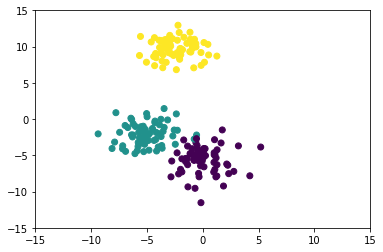

In [569]:

# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1.6, random_state=50)
# create np array for data 
points = data[0]
# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

X = data[0]
X[2]

In [570]:
temp_k  = Kmeans(3, 1, 600)
temp_fitted  = temp_k.fit_kmeans(X)
new_data = np.array([[1.066, -8.66],
                    [1.87876, -6.516],
                    [-1.59728965,  8.45369045],
                    [1.87876, -6.516]])
temp_fitted.predict(new_data)

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


array([0, 0, 1, 0], dtype=int64)

Wall time: 80.8 ms


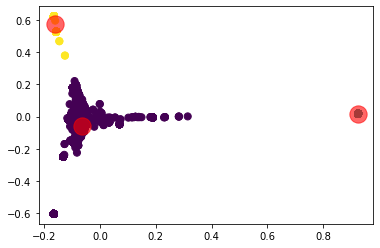

In [571]:
from sklearn.cluster import KMeans
n_clusters = 3
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600, algorithm = 'auto')
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='red', s=300, alpha=0.6);

# Choosing optimal clusters using Elbow method

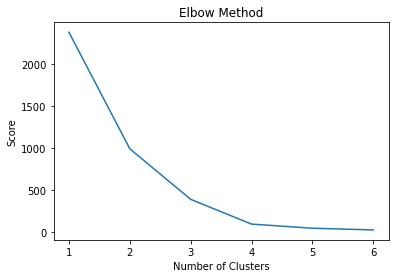

In [572]:
number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score = [i*-1 for i in score]

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

# Extracting top features

In [573]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df1 = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df1)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 20)

# Cluster 1

<AxesSubplot:xlabel='score', ylabel='features'>

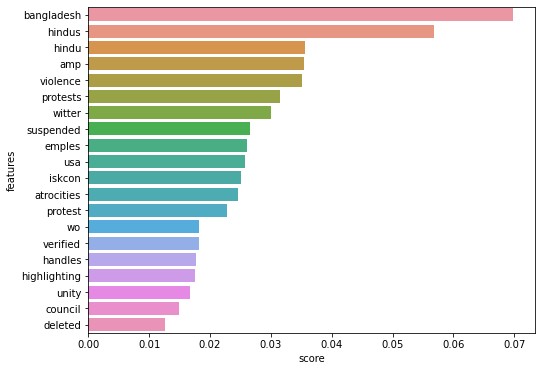

In [574]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[0][:20])

# Cluster 2

<AxesSubplot:xlabel='score', ylabel='features'>

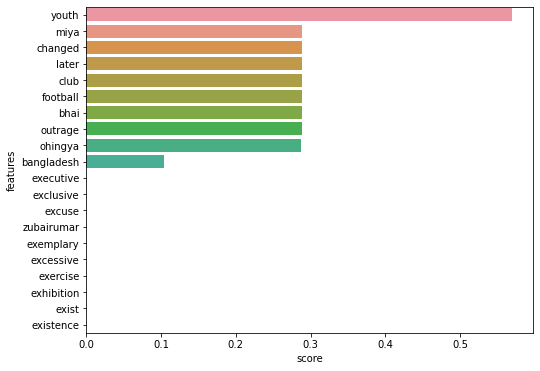

In [575]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[1][:20])

# Cluster 3

<AxesSubplot:xlabel='score', ylabel='features'>

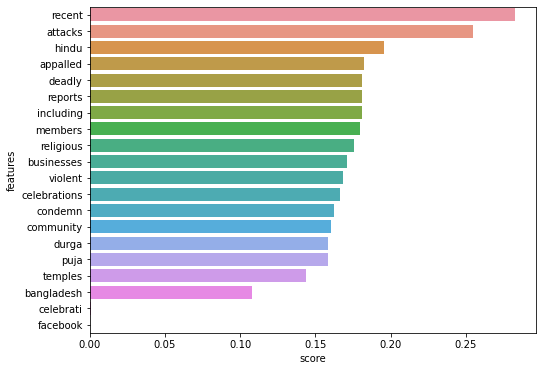

In [576]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[2][:20])

# Cluster visualization

In [577]:
for i, df1 in enumerate(dfs):
    df1.to_csv('df_'+str(i)+'.csv')

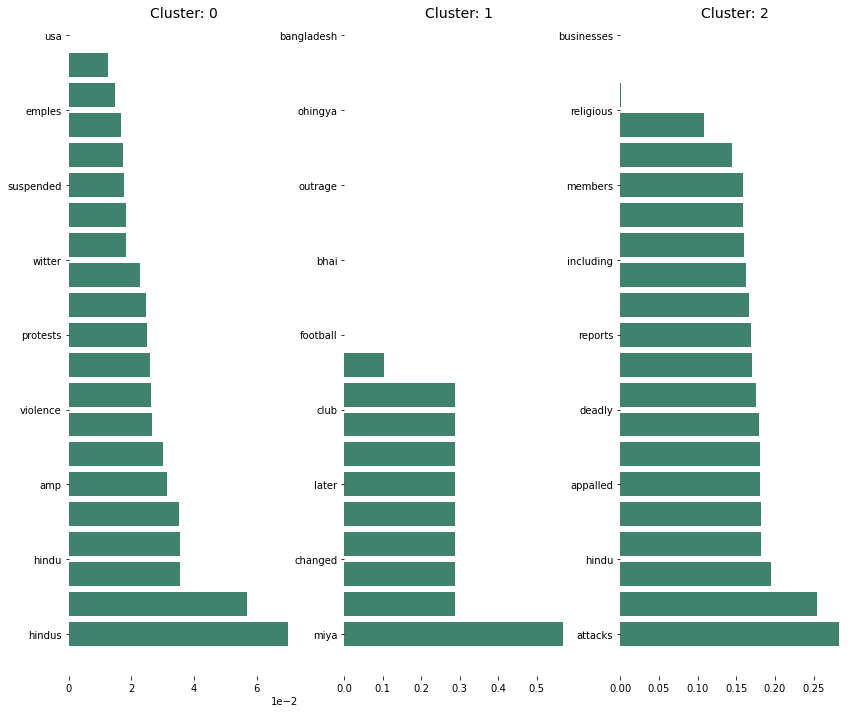

In [578]:
def plot_features(dfs):
    fig = plt.figure(figsize=(14,12))
    x = np.arange(len(dfs[0]))
    for i, df1 in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.set_title("Cluster: "+ str(i), fontsize = 14)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df1.score, align='center', color='#40826d')
        yticks = ax.set_yticklabels(df1.features)
    plt.show();
plot_features(dfs)

### Word Cloud

In [579]:
stopwords = set(STOPWORDS)

In [580]:
mask = np.array(Image.open("yoyo.png"))

In [581]:
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

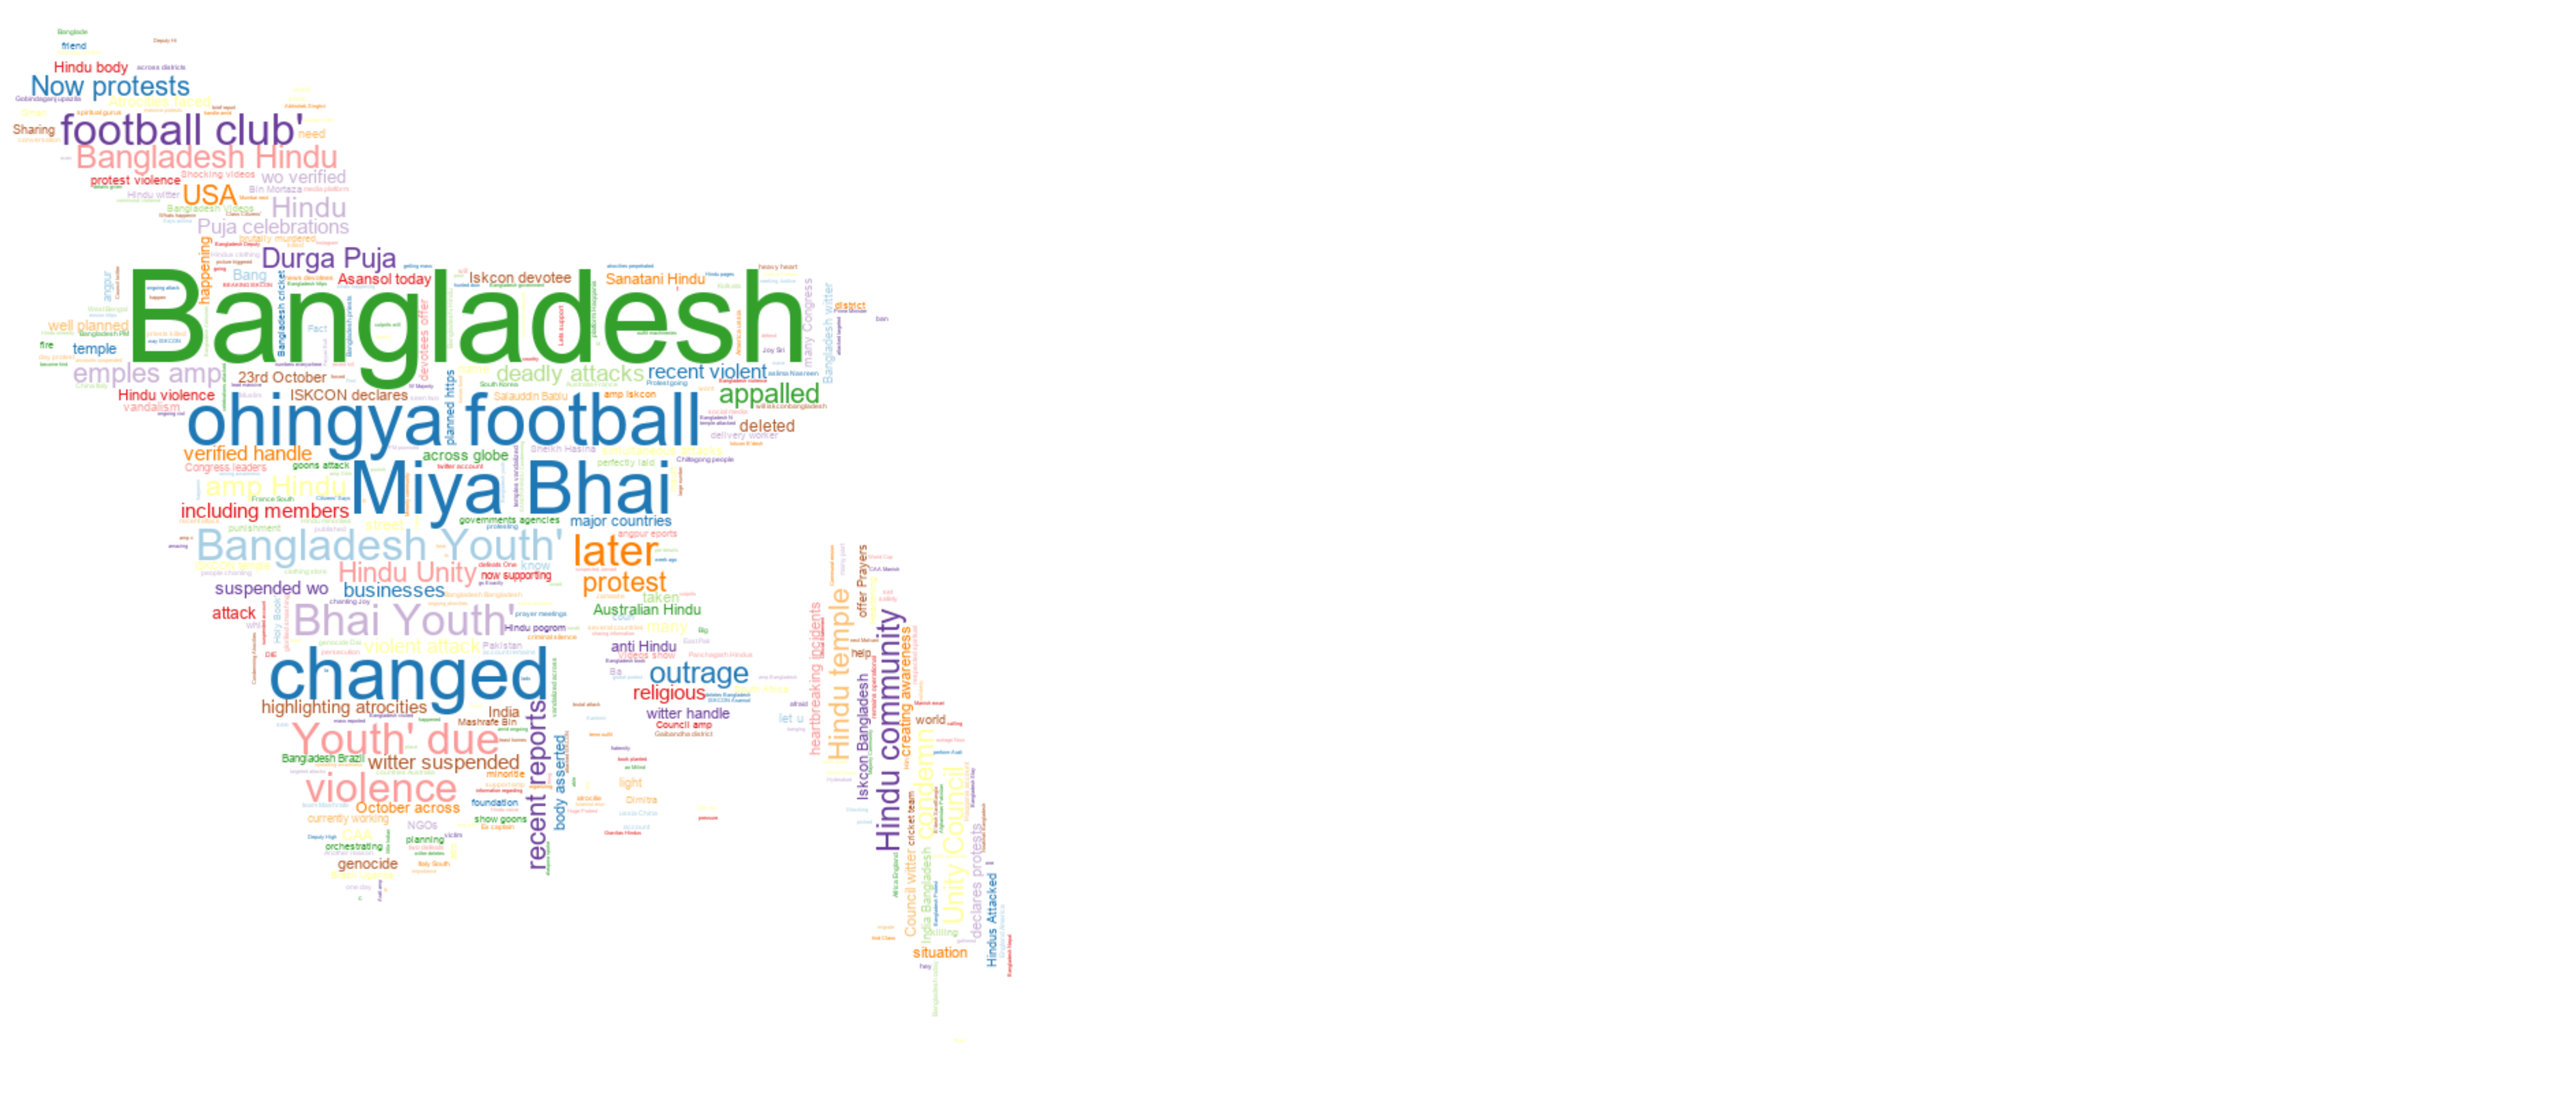

In [582]:
wordcloud = WordCloud(max_font_size=200,random_state = 42,
width = mask.shape[1],
height = mask.shape[0], background_color="white", max_words=2000000,
mask=mask,font_path = 'arial',colormap="Paired").generate(' '.join(df.text))
plt.figure( figsize=(100,100) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Sentiment Analysis 

In [583]:
def Analysis_score(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis']=df['polarity'].apply(Analysis_score)

In [584]:

# Printing positive tweets
print("Printing positive tweets:\n")
j=1
sortedDF = df.sort_values (by=[ 'polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+ sortedDF['text'][i])
    print()
j= j+1

Printing positive tweets:








1)   Fact that Bangladesh is able to get twitter accounts suspended who were just spreading awareness about what is happening to Hin







1)   ISKCON declares protests on 23rd October across globe in all major countries against Atrocities faced by Hindus in Bang

1)   If you live in NYC &amp; had food delivered during the pandemic, donate to help Salauddin's family get him home to Banglade














1)   Must say that the Vaishnav Hindus are so far doing a better job at protesting the atrocities in Bangladesh than the Shak


















1) headache for Bangladesh.. but Bangladesh is gonna facing png so easy win on cards for ban.. oman needs to cross the

1)   gs Exactly a week ago, this picture triggered a wave of anti-hindu violence in Bangladesh (book planted by suspected Jamaat-e-Is














1)   Protest going in many parts of the world. We are planning a one-day protest and prayer meetings for the victims in Bangladesh, on

1)   com 

In [585]:
# Printing negative tweets
print("Printing negative tweets:\n")
j=1
sortedDF = df.sort_values (by=[ 'polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+ sortedDF['text'][i])
    print()
j= j+1

Printing negative tweets:



1)   We are appalled by recent reports of deadly attacks on the Hindu community in Bangladesh. All, including members of religious




1)   We are appalled by recent reports of deadly attacks on the Hindu community in Bangladesh. All, including members of religious




1)   We are appalled by recent reports of deadly attacks on the Hindu community in Bangladesh. All, including members of religious

1)   Isckon devote of Bangladesh has organized iftar party to Muslim brother and recently he was killed. Pray f

1)   salam ights of minorities are inviolable. Sheikh Hasina citing Muslim persecutions in India as an excuse for the attack on Hindus





1)   We are appalled by recent reports of deadly attacks on the Hindu community in Bangladesh. All, including members of religious



1)   Hindus are forced to migrate from Bangladesh and Kashmir. Understand the importance of demography. Understand the ta



1)   We are appalled by recent reports of deadly attacks 

In [586]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['text']
ptweets
round( (ptweets.shape[0] / df.shape[0]) * 100,1)

19.9

In [587]:
# Print the percentage of negative tweets
ntweets = df [df.Analysis == 'Negative']
ntweets = ntweets['text']
ntweets
round ((ntweets.shape[0] / df.shape[0]) * 100, 1)

27.9

In [588]:
df['Analysis'].value_counts()

Neutral     10430
Negative     5587
Positive     3983
Name: Analysis, dtype: int64

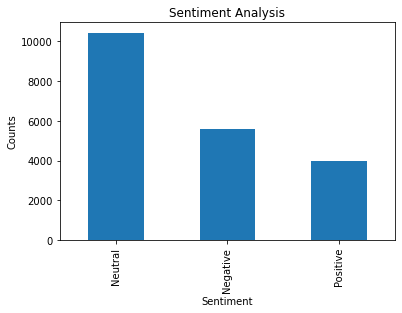

In [589]:
# PLotting and visuaLizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

## Topic Model

In [590]:
cv = CountVectorizer(max_df=0.95, min_df=2 , stop_words = 'english')
dtm = cv.fit_transform(df.text)
dtm

<20000x4494 sparse matrix of type '<class 'numpy.int64'>'
	with 186894 stored elements in Compressed Sparse Row format>

In [591]:
LDA = LatentDirichletAllocation(n_components=7,random_state=42)
LDA.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

In [592]:
len(cv.get_feature_names())

4494

In [593]:
import random

In [594]:
for i in range(10):
    random_word_id = random.randint(0,4494)
    print(cv.get_feature_names()[random_word_id])

iss
cricfreak
manik
foreign
event
alam
acadmy
cases
shopee
maqsood


In [595]:
len(LDA.components_)

7

In [596]:
LDA.components_

array([[ 0.14295631,  0.14297732,  0.14285716, ...,  0.14285718,
         0.14285717,  0.14285716],
       [ 0.14285725,  0.14285728,  0.14285717, ...,  0.1428572 ,
         0.14285718,  0.14285717],
       [ 0.14287411,  0.14285728,  0.14285717, ...,  0.1428572 ,
         3.14273036,  0.14285717],
       ...,
       [ 0.14286319,  0.14296415,  0.14285719, ...,  0.14285724,
         0.14298375,  0.1428572 ],
       [ 3.26392242,  0.14285727,  0.14285717, ...,  0.14294099,
         0.14285718,  3.14285695],
       [46.02147272,  0.14290996,  0.14285716, ...,  0.14287758,
         0.14285717,  0.14285717]])

In [597]:
len(LDA.components_[0])

4494

In [598]:
single_topic = LDA.components_[0]

In [599]:
single_topic.argsort()
single_topic[4094]
single_topic[4456]

single_topic.argsort()[-10:]
top_word_indices = single_topic.argsort()[-10:]



In [600]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

miya
changed
later
club
football
bhai
outrage
ohingya
youth
bangladesh


In [601]:
for index, topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['handles', 'wo', 'witter', 'suspended', 'hindus', 'miya', 'changed', 'later', 'club', 'football', 'bhai', 'outrage', 'ohingya', 'youth', 'bangladesh']


THE TOP 15 WORDS FOR TOPIC #1
['worker', 'bablu', 'salauddin', 'need', 'help', 'know', 'district', 'south', 'usa', 'emples', 'violence', 'amp', 'protests', 'hindus', 'bangladesh']


THE TOP 15 WORDS FOR TOPIC #2
['october', 'incidents', 'today', 'council', 'protests', 'iskcon', 'unity', 'atrocities', 'taken', 'protest', 'community', 'genocide', 'hindus', 'hindu', 'bangladesh']


THE TOP 15 WORDS FOR TOPIC #3
['victims', 'working', 'going', 'offer', 'ban', 'ussia', 'amp', 'devotees', 'prayers', 'violence', 'iskcon', 'hindus', 'india', 'protest', 'bangladesh']


THE TOP 15 WORDS FOR TOPIC #4
['hindus', 'simultaneous', 'asserted', 'australian', 'body', 'planned', 'com', 'attacks', 'https', 'temples', '17', 'amp', 'like', 'bangladesh', 'hindu']


THE TOP 15 WORDS FOR TOPIC #5
['unity', 'iskcon', 'witter', 'ap

In [602]:
dtm.shape

(20000, 4494)

In [603]:
topic_results = LDA.transform(dtm)
topic_results.shape

(20000, 7)

In [604]:
topic_results[0:10]

array([[0.01102874, 0.01099436, 0.01102568, 0.01100621, 0.01100623,
        0.9339299 , 0.01100889],
       [0.0238539 , 0.02399315, 0.02388642, 0.02401353, 0.02385474,
        0.8565171 , 0.02388116],
       [0.01190975, 0.01190838, 0.0119149 , 0.01190897, 0.01191327,
        0.92852337, 0.01192136],
       [0.01788423, 0.89270404, 0.01788151, 0.01788782, 0.01787331,
        0.01788509, 0.017884  ],
       [0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.14285714],
       [0.82809848, 0.02880152, 0.02859439, 0.02860095, 0.02860074,
        0.02860636, 0.02869756],
       [0.01190975, 0.01190838, 0.0119149 , 0.01190897, 0.01191327,
        0.92852337, 0.01192136],
       [0.92844933, 0.01190946, 0.01194992, 0.01191212, 0.01193029,
        0.01192721, 0.01192166],
       [0.9141727 , 0.01430631, 0.01431343, 0.01430167, 0.01429274,
        0.01431449, 0.01429866],
       [0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.1

In [605]:
df.head()

text  \
0                            BIG At the request of the Bangladesh Govt. witter deletes Bangladesh Hindu Unity Council's twitter ha   
1                                                                           Hundreds protest in Bangladesh over religious violence   
2    We are appalled by recent reports of deadly attacks on the Hindu community in Bangladesh. All, including members of religious   
3                                                  Now, protests in USA against the violence on emples &amp; Hindus in Bangladesh.   
4                                                                                                          in                        

               created                   id         statusSource  \
0  2021-10-20 01:52:15  1450640978625236992   Twitter for iPhone   
1  2021-10-20 01:52:14  1450640973856317445      Twitter Web App   
2  2021-10-20 01:52:13  1450640971083907073  Twitter for Android   
3  2021-10-20 01:52:12  1450640963878096901  Twitter for Android   
4  2021-10-20 01:52:11  1450640962468737024  Twitter for Android   

      screenName  retweetCount  isRetweet  statusSource_count  subjectivity  \
0      arvind291           292       True                   1         0.100   
1       gojharan           280       True                   1         0.250   
2   amodbhardwaj           898       True                   1         0.475   
3  VamsiKandula2          4260       True                   1         0.000   
4   Karan_Hu_Mei          2012       True                   1         0.000   

   polarity  Analysis  
0      0.00   Neutral  
1      0.00   Neutral  
2     -0.25  Negative  
3      0.00   Neutral  
4      0.00   Neutral